In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy
import scipy.io
import os

In [34]:
file = "/home/raphalinux/PycharmProjects/pythonProject/projet_sys/data/Multiclass_Drone_Audio"

In [35]:
from scipy.io import wavfile

In [36]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))
from data_processing import DataProcessing

In [6]:
multi_dataset = DataProcessing(file)

In [15]:
#multi_dataset.select_dataset_part("unknown",9700)

Size file before 10372
Size file after 672


In [16]:
audio_info={}

for class_name in os.listdir(file):
    class_path = os.path.join(file,class_name)

    if os.path.isdir(class_path):
        file_count = 0
        durations = []
        frame_rates = []

        for file_name in os.listdir(class_path):
            if file_name.endswith(".wav"):
                file_path = os.path.join(class_path,file_name)

                try:
                    sample_rate , audio = wavfile.read(file_path)
                    file_count+=1
                    frame_rates.append(sample_rate)
                    durations.append(len(audio)/sample_rate)

                except Exception as e:
                    print(f"Error when reading the file {file_name} : {e}")
                
    if file_count > 0:
        audio_info[class_name] = {
            "file_number" : file_count,
            "mean_duration" : np.mean(durations),
            "mean_sample_rate" : np.mean(sample_rate),
            "max_duration" : np.max(durations),
            "min_duration" : np.min(durations)

        }

In [17]:
for class_name, info in audio_info.items():
    print(f"\nClasse: {class_name}")
    print(f" - Nombre de fichiers : {info['file_number']}")
    print(f" - Durée moyenne : {info['mean_duration']:.2f} sec")
    print(f" - Durée max : {info['max_duration']:.2f} sec")
    print(f" - Durée min : {info['min_duration']:.2f} sec")
    print(f" - Fréquence d’échantillonnage moyenne : {info['mean_sample_rate']:.0f} Hz")


Classe: membo_1
 - Nombre de fichiers : 666
 - Durée moyenne : 1.00 sec
 - Durée max : 1.02 sec
 - Durée min : 0.65 sec
 - Fréquence d’échantillonnage moyenne : 16000 Hz

Classe: unknown
 - Nombre de fichiers : 672
 - Durée moyenne : 1.02 sec
 - Durée max : 5.12 sec
 - Durée min : 0.74 sec
 - Fréquence d’échantillonnage moyenne : 16000 Hz

Classe: bebop_1
 - Nombre de fichiers : 666
 - Durée moyenne : 1.00 sec
 - Durée max : 1.02 sec
 - Durée min : 0.77 sec
 - Fréquence d’échantillonnage moyenne : 16000 Hz


SHAPE: (14464,)
SHAPE: (14464,)


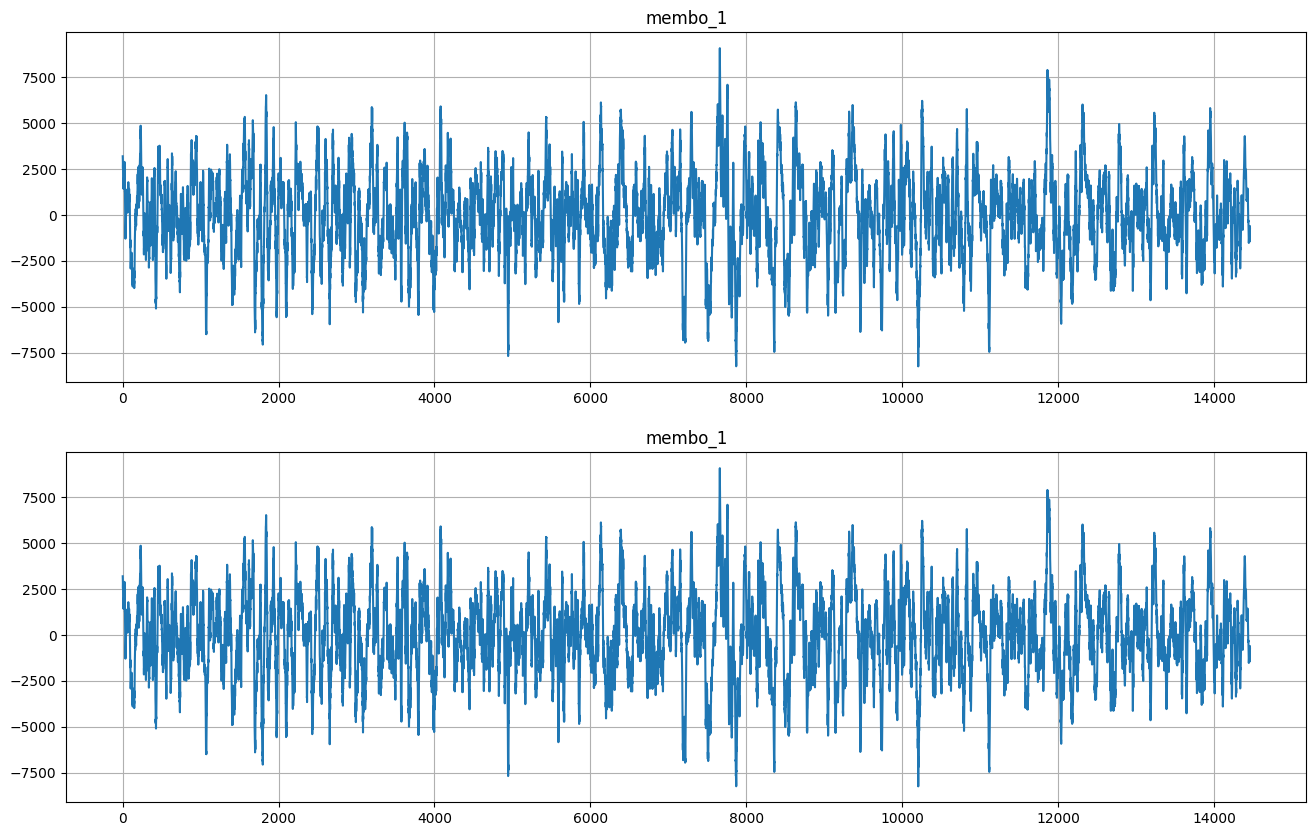

In [18]:
multi_dataset.plot_waveform(2,"membo_1")

SHAPE: (16384,)
SHAPE: (16384,)


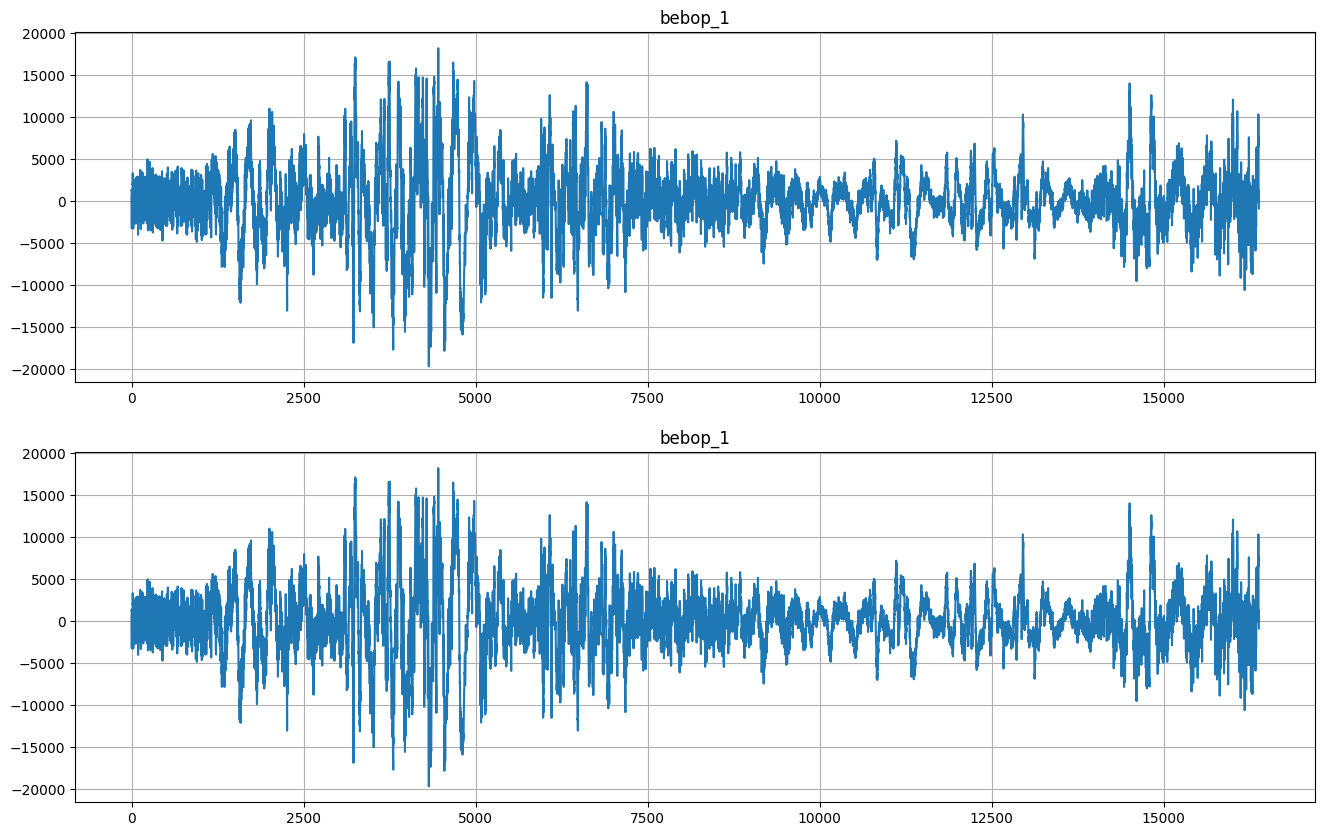

In [19]:
multi_dataset.plot_waveform(2,"bebop_1")

SHAPE: (15356,)
SHAPE: (15356,)


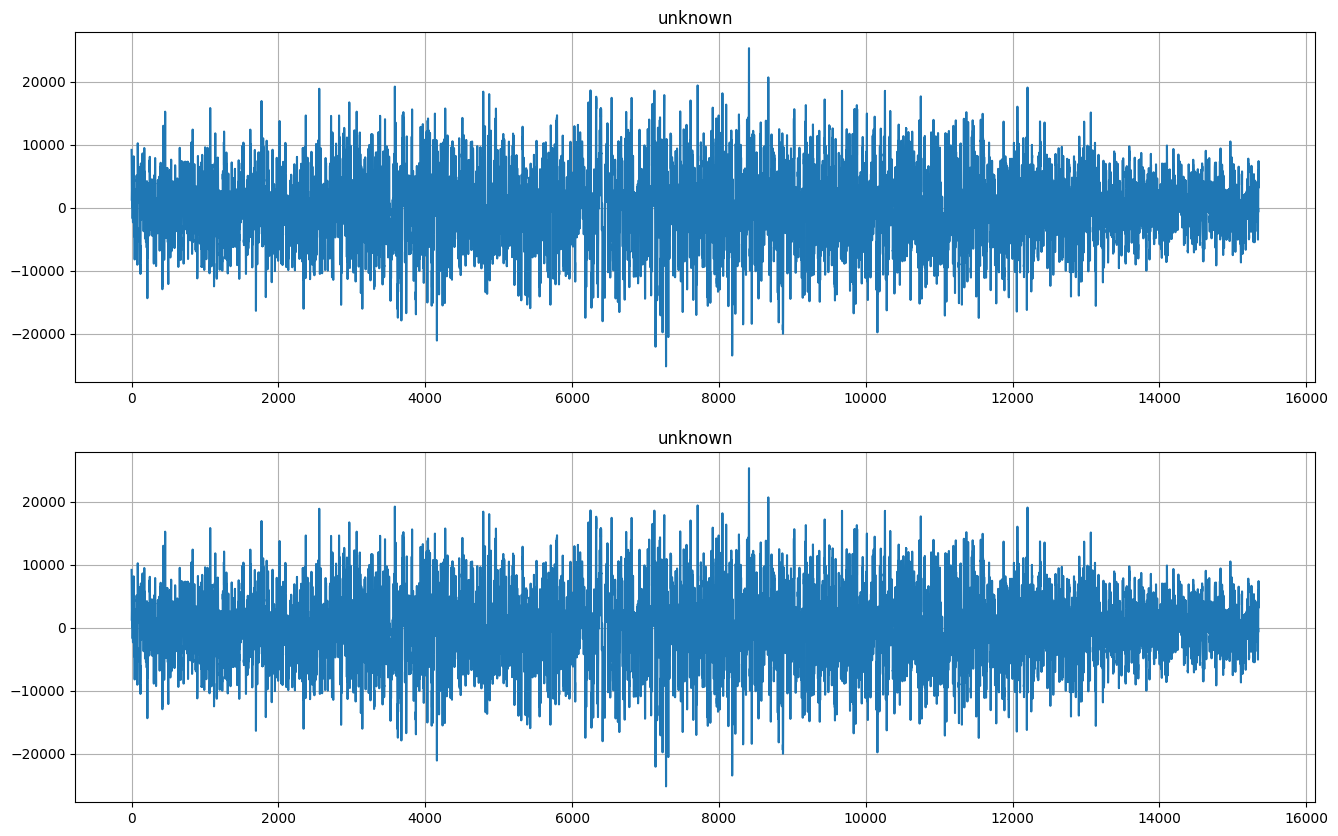

In [20]:
multi_dataset.plot_waveform(2,"unknown")

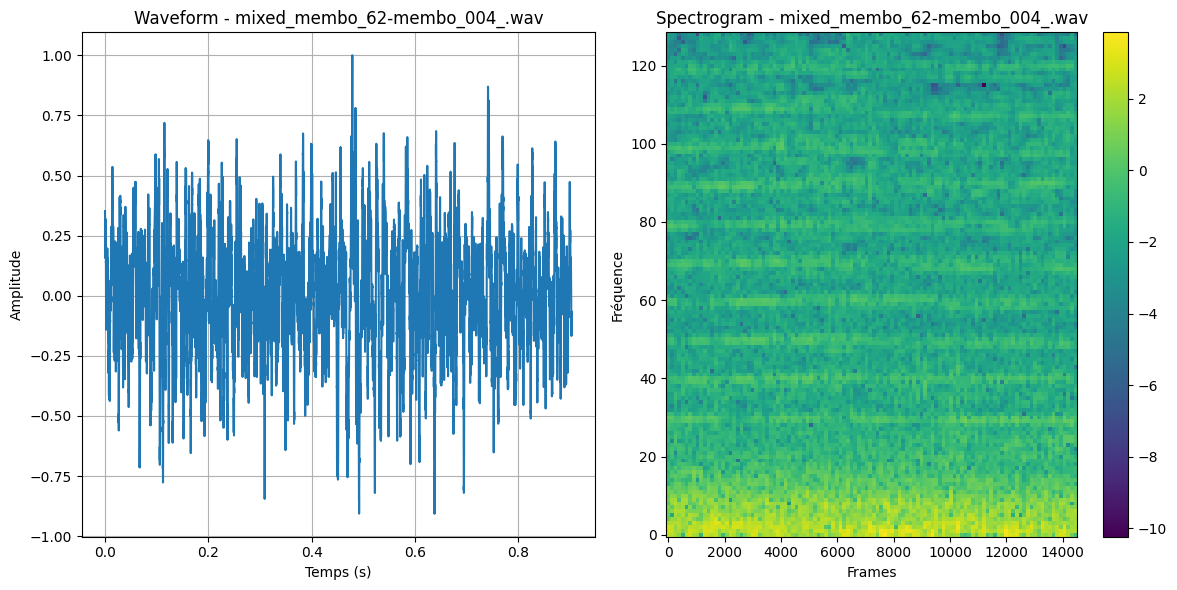

In [21]:
multi_dataset.plot_spectrogram(1,"membo_1")

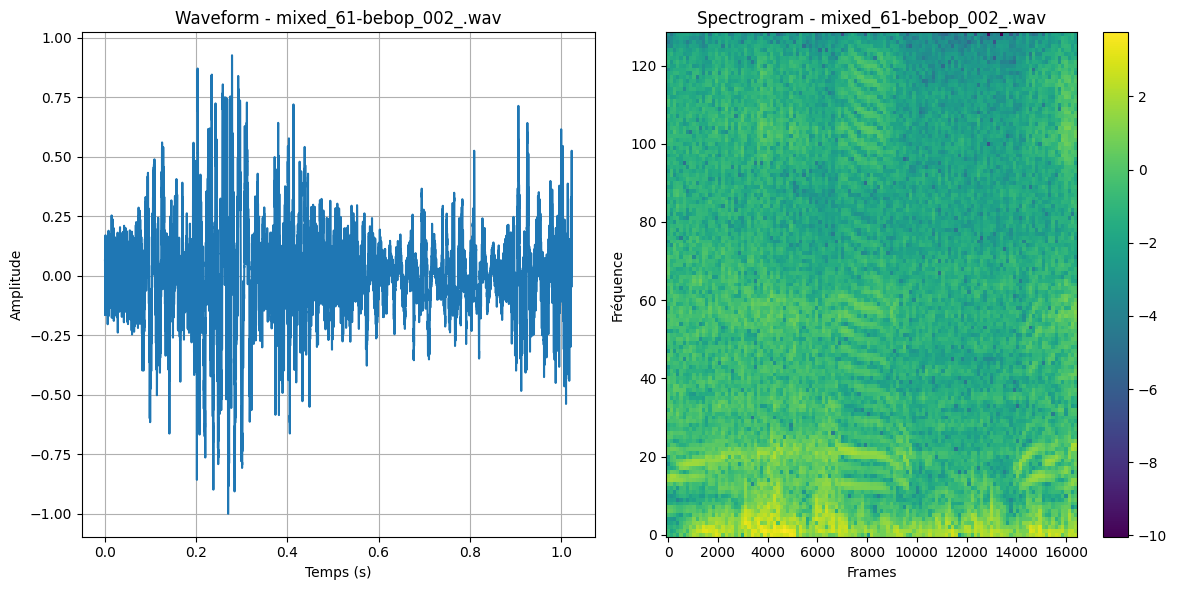

In [22]:
multi_dataset.plot_spectrogram(1,"bebop_1")

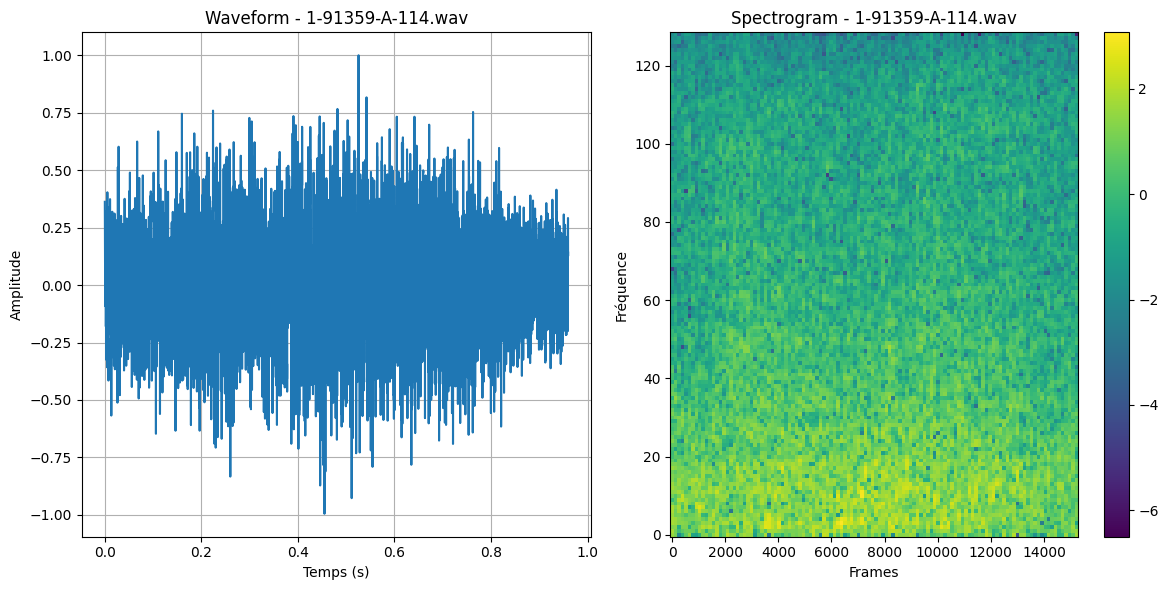

In [23]:
multi_dataset.plot_spectrogram(1,"unknown")

In [7]:
train_set_multi, val_set_multi, test_set_multi = multi_dataset.get_spectrogram_dataset()

GO
Found 2004 files belonging to 3 classes.
Using 1904 files for training.
Found 2004 files belonging to 3 classes.
Using 100 files for validation.
(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Label names: ['bebop_1' 'membo_1' 'unknown']
(TensorSpec(shape=(None, 124, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [65]:
from model import Model

Multiclass_Classification = Model(train_set_multi)

In [66]:
Multiclass_CNN = Multiclass_Classification.CNN(n_labels=3)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_9 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_9 (Normaliza  (None, 32, 32, 1)         3         
 tion)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 14, 14, 64)       

In [67]:
from train import Train

training_multi = Train(25, train_set_multi,val_set_multi,Multiclass_CNN)

Epoch 1/25
21/21 [==============================] - 5s 109ms/step - loss: 0.7057 - accuracy: 0.6852 - val_loss: 0.4330 - val_accuracy: 0.8500
Epoch 2/25
21/21 [==============================] - 2s 85ms/step - loss: 0.4070 - accuracy: 0.8502 - val_loss: 0.4049 - val_accuracy: 0.8600
Epoch 3/25
21/21 [==============================] - 2s 86ms/step - loss: 0.3560 - accuracy: 0.8758 - val_loss: 0.3374 - val_accuracy: 0.8700
Epoch 4/25
21/21 [==============================] - 2s 86ms/step - loss: 0.2987 - accuracy: 0.8901 - val_loss: 0.2896 - val_accuracy: 0.8800
Epoch 5/25
21/21 [==============================] - 2s 86ms/step - loss: 0.2438 - accuracy: 0.9006 - val_loss: 0.2733 - val_accuracy: 0.8900
Epoch 6/25
21/21 [==============================] - 2s 85ms/step - loss: 0.2116 - accuracy: 0.9149 - val_loss: 0.2772 - val_accuracy: 0.8600
Epoch 7/25
21/21 [==============================] - 2s 88ms/step - loss: 0.1960 - accuracy: 0.9255 - val_loss: 0.2517 - val_accuracy: 0.8900
Epoch 8/25
2

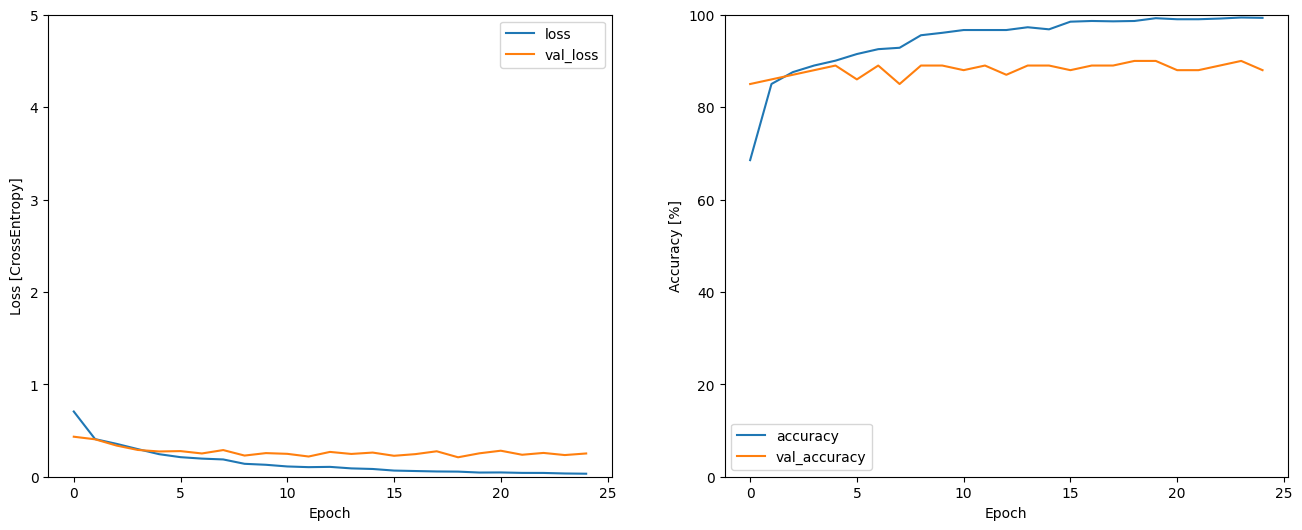

In [68]:
trained_cnn_multi = training_multi.training_loop()

In [69]:
from evaluate import Evaluate

evaluation_multi = Evaluate(trained_cnn_multi,test_set_multi,["B","M","U"])

In [70]:
y_true_multi, y_pred_multi, precision_multi, recall_multi, f1_multi = evaluation_multi.accuracy()

9/9 [==============================] - 1s 38ms/step - loss: 0.2394 - accuracy: 0.9514
Model accuracy on test dataset: 0.9513888955116272
9/9 [==============================] - 0s 25ms/step
Model accuracy on test dataset : 0.9513888888888888
Precision: 0.95
Recall: 0.95
F1-Score: 0.95


New confusion matrix
New confusion matrix


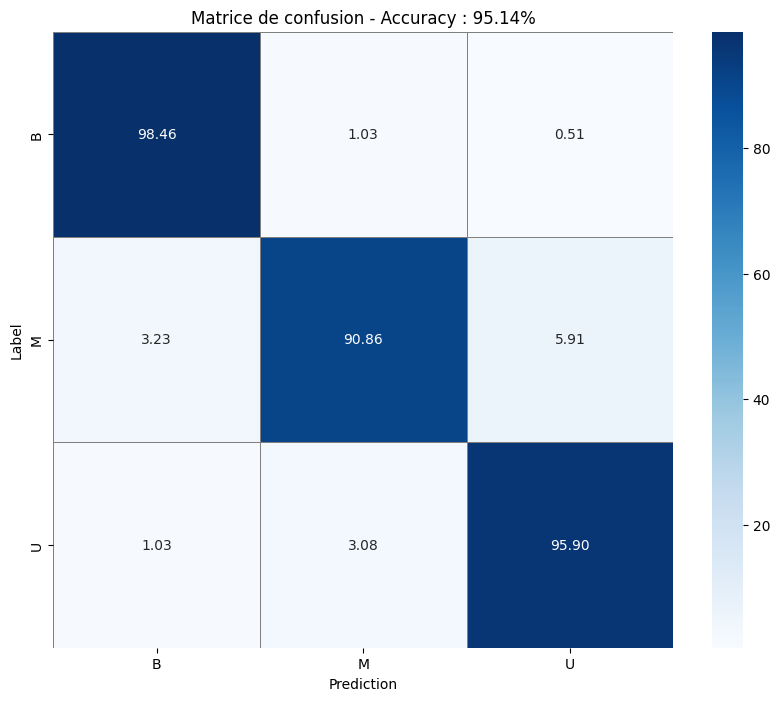

In [74]:
evaluation_multi.conf_matrix(y_true_multi, y_pred_multi)

In [75]:
training_multi.save_model(trained_cnn_multi,"CNN_multi_cassif")

INFO:tensorflow:Assets written to: saved_model/CNN_multi_cassif/assets


INFO:tensorflow:Assets written to: saved_model/CNN_multi_cassif/assets


Modèle sauvegardé à : saved_model/CNN_multi_cassif


MEL Spectrogram based classification

In [8]:
multi_mel_dataset = DataProcessing(file)

(129, 124)
(129, 124)


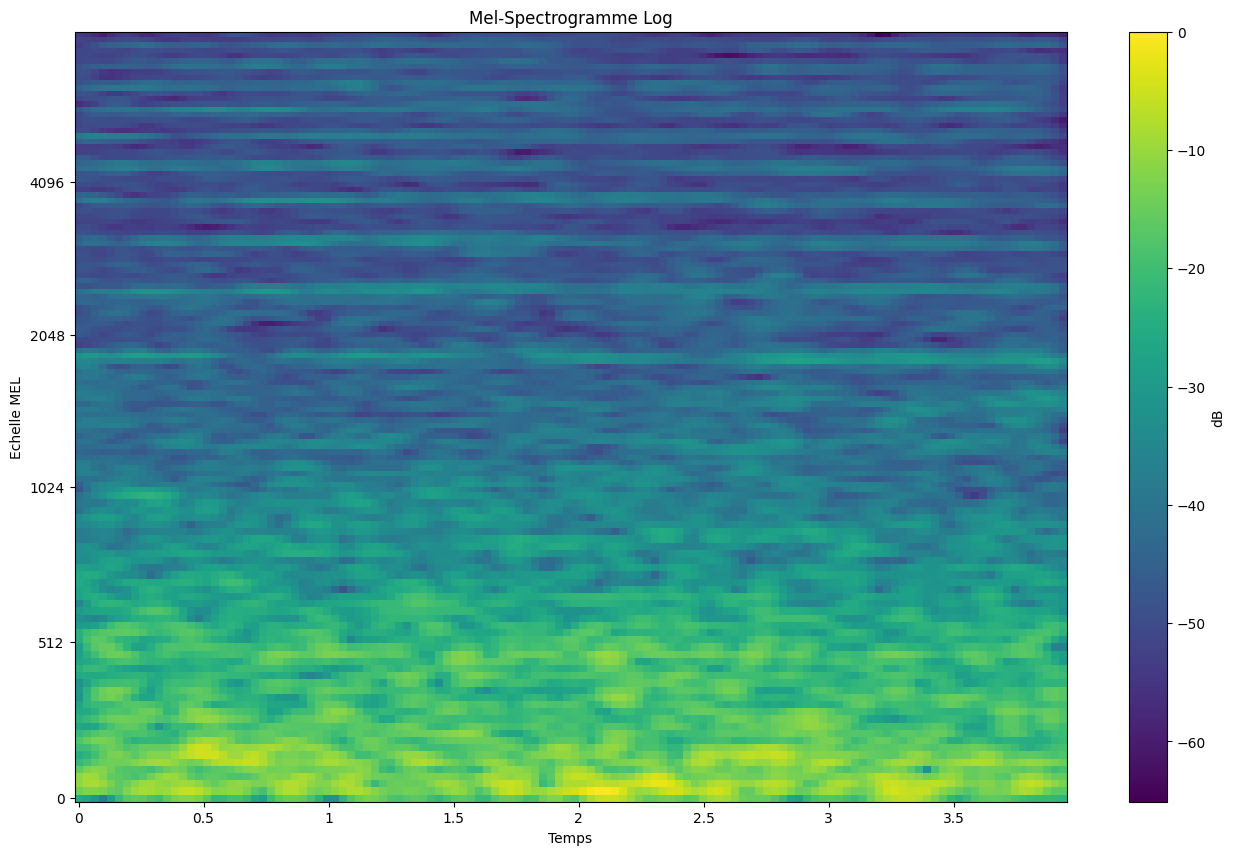

In [10]:
multi_mel_dataset.plot_mel_spectrogram(1,"membo_1")

(129, 124)
(129, 124)


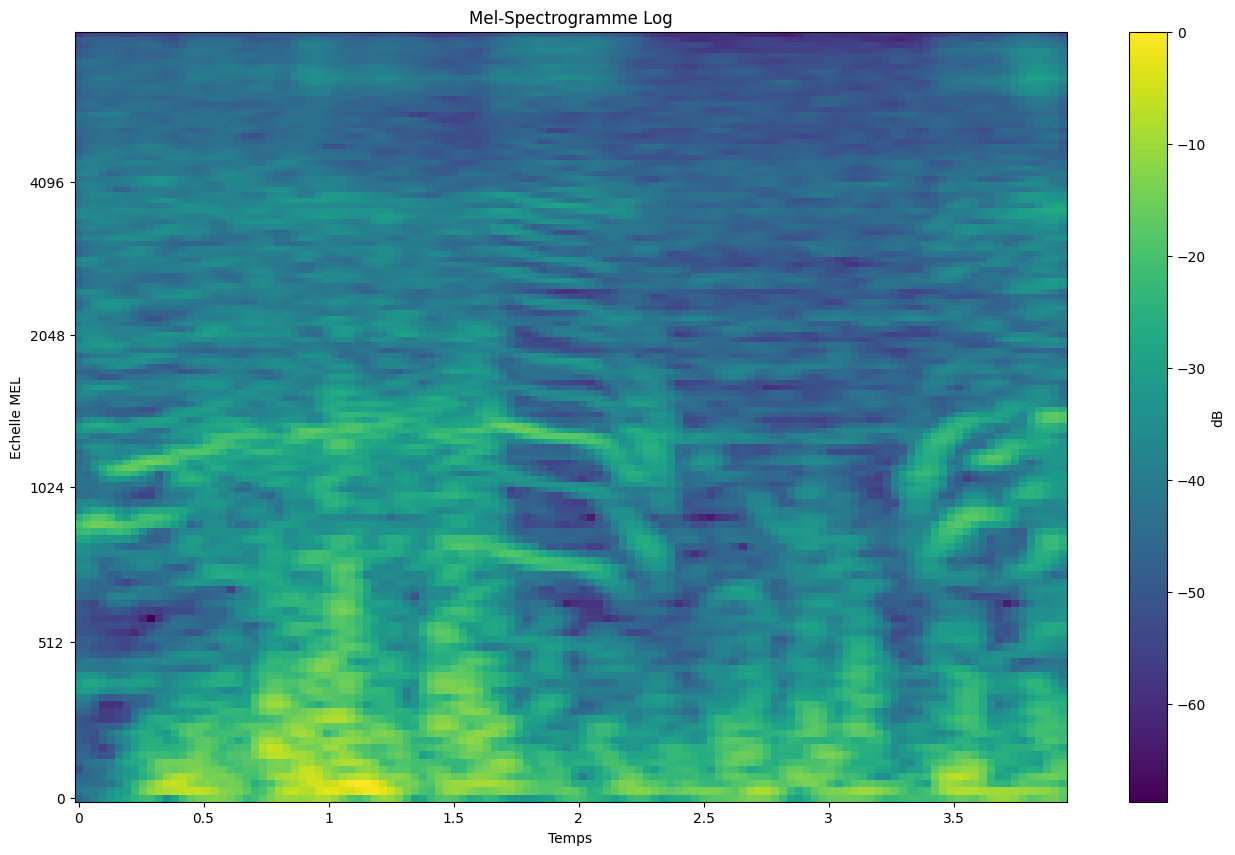

In [11]:
multi_mel_dataset.plot_mel_spectrogram(1,"bebop_1")

In [17]:
train_multi_mel, val_multi_mel, test_multi_mel = multi_mel_dataset.get_mel_spectrogram_dataset()

GO
Found 2004 files belonging to 3 classes.
Using 1904 files for training.
Found 2004 files belonging to 3 classes.
Using 100 files for validation.
(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Label names: ['bebop_1' 'membo_1' 'unknown']
(TensorSpec(shape=(None, 124, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [22]:
for audio, label in train_multi_mel.take(5):
    print(f"Label: {label.numpy()}, Fichier audio: {audio.numpy().shape}")

Label: [1 1 1 0 0 2 2 1 2 2 1 2 2 1 0 0 1 2 2 0 0 0 0 0 0 2 0 1 0 2 1 0 1 2 2 0 0
 0 2 0 0 0 2 1 1 0 2 2 2 2 1 2 1 2 2 2 2 2 2 1 1 1 2 2], Fichier audio: (64, 124, 129, 1)
Label: [1 0 0 2 1 0 1 2 2 1 1 0 0 2 1 2 2 0 2 0 1 0 0 1 0 1 0 2 0 0 0 0 0 0 0 2 0
 0 2 1 2 2 0 2 2 1 2 0 0 0 2 0 1 1 0 1 0 2 0 2 2 2 0 1], Fichier audio: (64, 124, 129, 1)
Label: [1 0 0 1 2 0 0 0 2 0 1 0 0 2 0 1 2 2 2 2 0 0 1 0 2 0 1 2 1 2 1 2 0 2 2 1 2
 2 0 1 0 0 2 0 1 0 0 0 0 1 0 2 0 1 1 1 0 0 0 1 1 0 1 1], Fichier audio: (64, 124, 129, 1)
Label: [1 0 1 0 2 0 1 1 1 2 0 1 1 2 2 0 2 0 1 1 1 2 1 1 2 0 1 0 1 1 2 1 2 0 1 1 0
 0 0 2 2 1 1 1 2 2 2 2 1 0 2 1 2 2 2 2 0 1 2 0 0 0 1 1], Fichier audio: (64, 124, 129, 1)
Label: [0 2 2 0 2 1 0 1 2 0 1 0 0 0 1 2 2 1 0 0 2 1 1 0 0 1 2 2 1 0 2 1 2 0 2 0 1
 2 2 1 0 1 1 1 1 1 2 1 2 0 1 1 2 2 2 0 2 0 1 1 0 2 0 0], Fichier audio: (64, 124, 129, 1)


In [29]:
from model import Model

Multi_mel_Model = Model(train_multi_mel)


In [30]:
Multi_mel_CNN = Multi_mel_Model.CNN(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_1 (Normaliza  (None, 32, 32, 1)         3         
 tion)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)       

In [37]:
from train import Train

training_multi_mel = Train(50,train_multi_mel,val_multi_mel,Multi_mel_CNN)

In [38]:
trained_Multi_mel_CNN = training_multi_mel.training_loop()

Epoch 1/50
21/21 [==============================] - 3s 70ms/step - loss: 1.0986 - accuracy: 0.3434 - val_loss: 1.0983 - val_accuracy: 0.3500
Epoch 2/50
21/21 [==============================] - 1s 60ms/step - loss: 1.0985 - accuracy: 0.3434 - val_loss: 1.0984 - val_accuracy: 0.3500
Epoch 3/50
21/21 [==============================] - 1s 58ms/step - loss: 1.0985 - accuracy: 0.3434 - val_loss: 1.0983 - val_accuracy: 0.3500
Epoch 4/50
21/21 [==============================] - 1s 63ms/step - loss: 1.0985 - accuracy: 0.3434 - val_loss: 1.0983 - val_accuracy: 0.3500
Epoch 5/50
16/21 [=====================>........] - ETA: 0s - loss: 1.0985 - accuracy: 0.3403

KeyboardInterrupt: 

MFCC

In [5]:
from data_processing import DataProcessing

multi_mfcc_dataset = DataProcessing(file)

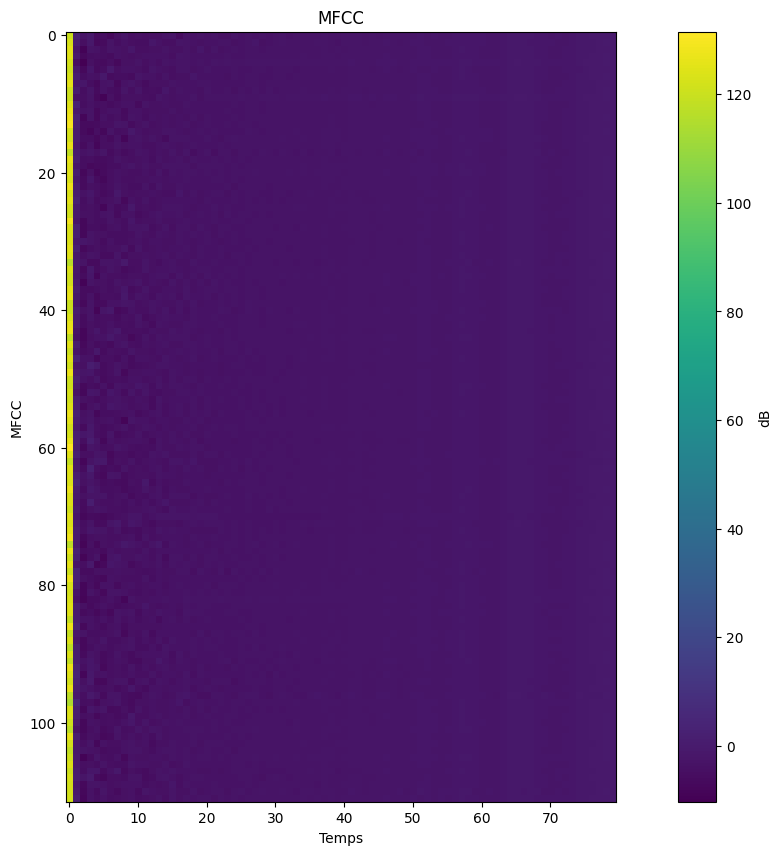

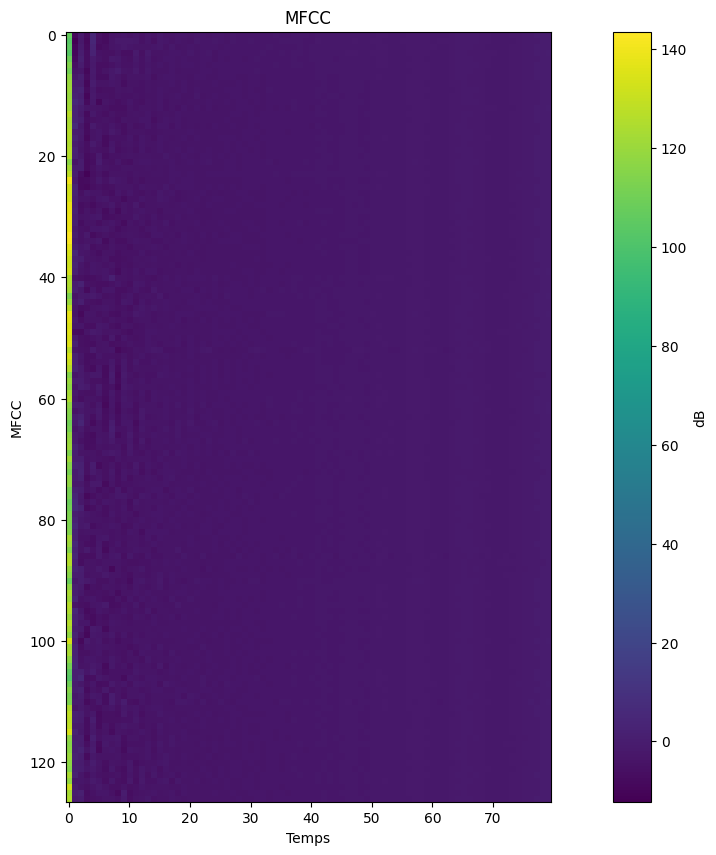

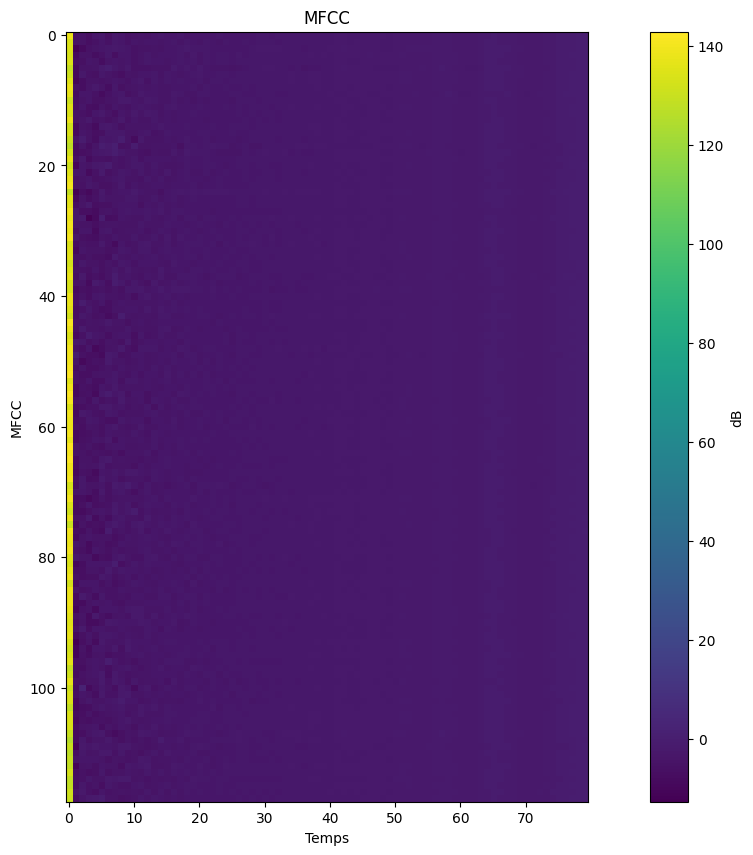

In [6]:
multi_mfcc_dataset.plot_mfcc(1,"membo_1")
multi_mfcc_dataset.plot_mfcc(1,"bebop_1")
multi_mfcc_dataset.plot_mfcc(1,"unknown")

In [7]:
train_mfcc_multi, val_mfcc_multi, test_mfcc_multi = multi_mfcc_dataset.get_mfcc_dataset()

GO
Found 2004 files belonging to 3 classes.
Using 1904 files for training.
Found 2004 files belonging to 3 classes.
Using 100 files for validation.
(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Label names: ['bebop_1' 'membo_1' 'unknown']
(TensorSpec(shape=(None, 124, 80, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [37]:
from model import Model

Multi_mfcc_Model = Model(train_mfcc_multi)
Multi_mfcc_cnn = Multi_mfcc_Model.CNN(3,(124,80,1))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_11 (Resizing)      (None, 32, 32, 1)         0         
                                                                 
 normalization_11 (Normaliz  (None, 32, 32, 1)         3         
 ation)                                                          
                                                                 
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 14, 14, 64)      

In [20]:
from train import Train

training_mfcc_multi = Train(50,train_mfcc_multi,val_mfcc_multi,Multi_mfcc_cnn)

Epoch 1/50
21/21 [==============================] - 2s 52ms/step - loss: 0.7736 - accuracy: 0.6634 - val_loss: 0.4865 - val_accuracy: 0.8400
Epoch 2/50
21/21 [==============================] - 1s 43ms/step - loss: 0.5332 - accuracy: 0.7831 - val_loss: 0.3914 - val_accuracy: 0.8300
Epoch 3/50
21/21 [==============================] - 1s 44ms/step - loss: 0.5152 - accuracy: 0.7794 - val_loss: 0.4154 - val_accuracy: 0.7900
Epoch 4/50
21/21 [==============================] - 1s 46ms/step - loss: 0.4648 - accuracy: 0.8110 - val_loss: 0.3643 - val_accuracy: 0.8300
Epoch 5/50
21/21 [==============================] - 1s 44ms/step - loss: 0.4325 - accuracy: 0.8178 - val_loss: 0.3343 - val_accuracy: 0.8400
Epoch 6/50
21/21 [==============================] - 1s 42ms/step - loss: 0.4031 - accuracy: 0.8313 - val_loss: 0.3652 - val_accuracy: 0.8600
Epoch 7/50
21/21 [==============================] - 1s 44ms/step - loss: 0.4103 - accuracy: 0.8238 - val_loss: 0.3108 - val_accuracy: 0.8800
Epoch 8/50
21

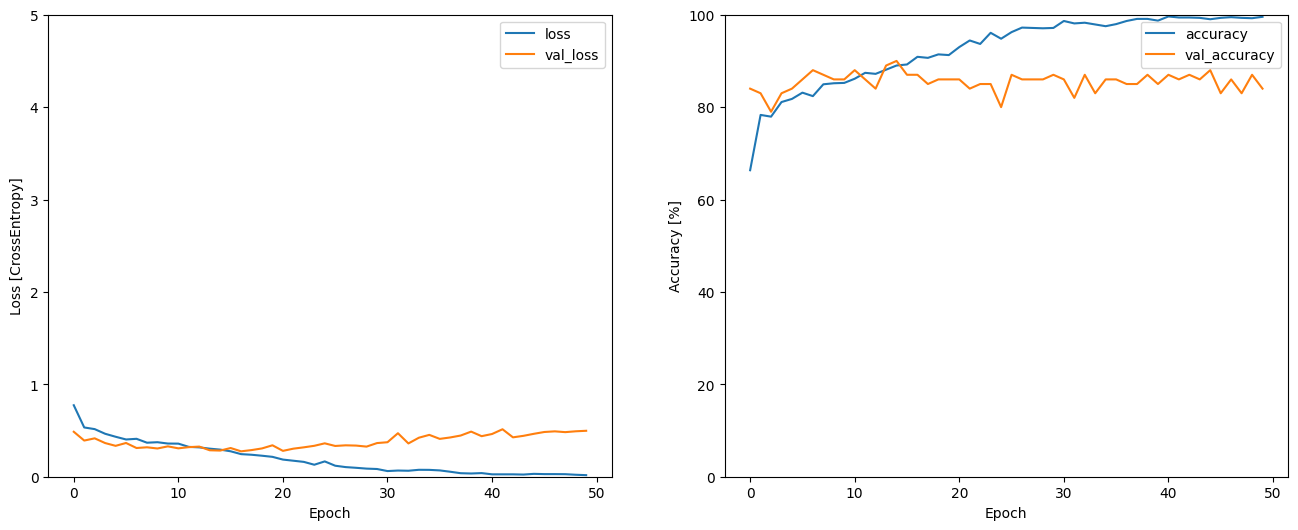

In [21]:
trained_mfcc_multi = training_mfcc_multi.training_loop()

In [22]:
from evaluate import Evaluate

evaluation_mfcc_multi = Evaluate(trained_mfcc_multi,test_mfcc_multi,["B","M","U"])

In [23]:
y_true_mfcc_multi, y_pred_mfcc_multi, precision_mfcc_multi, recall_mfcc_multi, f1_mfcc_multi = evaluation_mfcc_multi.accuracy()

1/9 [==>...........................] - ETA: 0s - loss: 0.7182 - accuracy: 0.8750

9/9 [==============================] - 0s 17ms/step - loss: 0.4367 - accuracy: 0.8958
Model accuracy on test dataset: 0.8958333134651184
9/9 [==============================] - 0s 12ms/step
Model accuracy on test dataset : 0.8958333333333334
Precision: 0.90
Recall: 0.90
F1-Score: 0.90
